# Graphs and Trees

<pre>_____________________________________________________________________________________________________</pre>

# CS2311-Algorithms and Data Structures With Python
## Homework 9
## Due Date: See Blackboard

## Student Name: Huy Huynh

**Submission guidelines**

• Submit your Jupyter Notebook file on BlackBoard.  Please provide any supporting data input/output files in the zip folder.  Include images output in the zip file and embed in the notebook file.  I should be able to run and replicate the run of the code you submitted.

<pre>
HW#.zip    -> HW3.zip
</pre>

**Grading Criteria:**
<pre>
•	Good documentation/comments and program readability
•	Algorithm/pseudo-code is explained and efficient.  Use functions as appropriate to simplify and improve readability.
•	Program runs correctly for test cases with no syntax errors or logical errors
</pre>

<pre>_____________________________________________________________________________________________________</pre>

# Topic:  Graphs - 75 Points 

## 1.	[75 points] Analysis of CS2311 Fall 19 student contact network 
We are interested in seeing if we can draw any insights on the CS2311 nearest neighbor (level 1) contact network for the past semester.  

## (25 Points Extra Credit for applying this analysis to the CS2311 Spring 2020 student data & answering the questions)

<pre>_____________________________________________________________________________________________________</pre>

<a id='TOC'></a>
# Table of Contents

<br>[1. Setup](#Setup)
<br>[2. Load student network data from excel](#LoadData)
<br>....[2.1 Get edge data from excel tab](#LoadEdgeData)
<br>....[2.2 Get node data from excel tab](#LoadNodeData)
<br>[3. Set up networkx graph](#SetUpGraph)
<br>....[3.1 Node inspection](#NodeInspection)
<br>....[3.2 Edge inspection](#EdgeInspection)
<br>[4. Centrality Measures](#Centrality)
<br>....[4.1 Degree](#Degree)
<br>....[4.2 Betweenness centrality](#Betweenness)
<br>....[4.3 Closeness centrality](#Closeness)
<br>....[4.4 Degree centrality](#DegreeCentrality)
<br>....[4.5 Clustering centrality](#Clustering)
<br>[5. Degree distribution](#DegreeDistribution)
<br>[6. Shortest path between two nodes](#ShortestPath)
<br>[7. Finding neighbors of a node](#Neighbors)
<br>[8. Visualizing the graph](#Visualizing)
<br>....[8.1 Spring layout](#SpringLayout)
<br>....[8.2 Circular layout](#CircularLayout)
<br>....[8.3 Circos plot](#CircosLayout)
<br>[9. Creating a sub-graph](#Subgraph)
<br>
<br>**[10. Extra-credit and questions](#ExtraCredit)**


<pre>_____________________________________________________________________________________________________</pre>

## **Our to do list: Fill-in the missing portions of code and match the output shown**

_Importing Data:_

- **Task 1**: Get information for nodes and edges from correct tab in excel file
- **Task 2**: Do exploratory analysis on node data & wrangle data as needed
- **Task 3**: Do exploratory analysis on edge data & wrangle data as needed

<br>

_Set up networkx graph:_

- **Task 4**: Need to take node dataframe and create datastructure for nodes neeeded by networkx 
- **Task 5**: Need to take edge dataframe and create datastructure for edges neeeded by networkx 

<br>

_Examine graph nodes and edges:_

- **Task 6**: Inspect graph structure and inspect selected nodes and edges

<br>

_Perform graph analytics:_

- **Task 7**: Calculate centrality measures and summarize into node dataframe
- **Task 8**: Plot the graph centrality disribution 

<br>

_Visualize the graph, customize the look of the graph_
- **Task 9**: Plot graph using spring, circular and circos format
- **Task 10**: Customize graph to label nodes, change color of nodes based on criteria

<br>

_Misc: Find nearest neighbors, shortest path, create subraph of nodes_
- **Task 11**: Use misc methods and functions for graph analysis

<pre>_____________________________________________________________________________________________________</pre>

<a id='Setup'></a>
# 1. Import and setup
[TOC](#TOC)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx                 # <--- these are new packages
from nxviz import CircosPlot          # <--- This package let's us do a special type of plot

In [2]:
# display() does a pretty print of dataframes so they look like they do in jupyter 
from IPython.core.display import display, HTML
# Modify the height of your scolling output window in Jupyter notebook
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

<a id='LoadData'></a>
# 2. Load student network edge data from excel
[TOC](#TOC)

### Methods to use:
* ExcelFile()

In [3]:
# read from excel
xlsx = pd.ExcelFile('CS2311_F19_Data.xlsx')

In [4]:
type(xlsx)    #  Excel object which contains our excel sheets and data within sheet

pandas.io.excel._base.ExcelFile

## **Diagnosing data cleaning problems using simple `pandas` and visualizations** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column
- `.duplicates()` finds the number of duplicate values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

<a id='LoadEdgeData'></a>
# 2.1 Get edge data from excel tab
[TOC](#TOC)

### Methods/functions to learn to use:
* `read_excel()`  - select the sheet with name "Edge_List" in your excel file
* `tuple()`
* `.head()`,`.tail()`,`.dtypes()`,`.info()`,`.describe()`,`.isna().sum()`,`.unique()`,`.duplicates()`,`.drop_duplicates()`
* `sns.distplot()`

In [5]:
# ----------------fill in missing code
# get the edge data from the edge list tab
edge_df = pd.read_excel(xlsx, sheet_name = "Edge_List")

In [6]:
# inspect the dataframe
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5)
0,1,10,1.2
1,1,6,0.8
2,1,16,0.8
3,1,18,1.6
4,1,12,0.4


In [7]:
# check that data types are ones you want to work with
edge_df.dtypes

N_1_Index            int64
N_2_Index            int64
Frequency_(1-5)    float64
dtype: object

In [8]:
# quick way to check for missing values - do all columns have same number of entries?
edge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
N_1_Index          84 non-null int64
N_2_Index          84 non-null int64
Frequency_(1-5)    84 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [9]:
# check for missing data
edge_df.isna().sum()

N_1_Index          0
N_2_Index          0
Frequency_(1-5)    0
dtype: int64

**Note:** There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In our case here there are no missing values.

In [10]:
# quick summary look at your data
edge_df.describe()

,N_1_Index,N_2_Index,Frequency_(1-5)
count,84.000000,84.000000,84.000000
mean,8.940476,19.857143,1.357143
std,4.815515,13.216586,0.541369
min,1.000000,1.000000,0.400000
25%,4.000000,9.750000,0.800000
50%,9.500000,17.500000,1.200000
75%,13.000000,30.000000,2.000000
max,16.000000,49.000000,2.000000


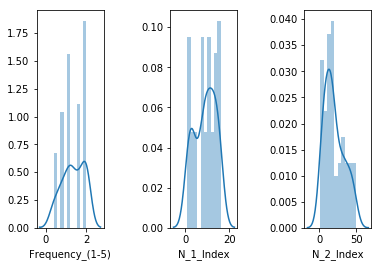

In [11]:
# Visualize the distribution of the columns - set up a subplot grid 1x3 for this
fig,ax = plt.subplots(1,3)
plt.subplots_adjust(wspace=1, hspace=1)
sns.distplot(edge_df["Frequency_(1-5)"],ax=ax[0],bins=10)
sns.distplot(edge_df["N_1_Index"],ax=ax[1],bins=10)
sns.distplot(edge_df["N_2_Index"],ax=ax[2],bins=10)

Now set up a list of edge tuples that we can import later into the networkx package by iterating through the length of the dataframe and putting into a list.

In [12]:
# Find number of unique values in N_1_Index and N_2_Index. Using display() here to do the pretty print of the output.
# Methods to use:  .unique(), .sort_values()
display(edge_df.N_1_Index.unique())
display(edge_df.N_2_Index.sort_values().unique())

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [13]:
# need to check that edges have consistent weight i.e. A to B at 5 is same as B to A at 5. Students may have
# weighted the reciprocal relationship differently.  If so set weight to the average
# set up a new column with the node pairs in order as a string. We will search for duplicates on this
e1 = edge_df.N_1_Index

In [14]:
e2 = edge_df.N_2_Index

In [15]:
# function to build a string of node pairs in low to high order e.g. 3 to 5 ---> '35' and 5 to 3 ---> '35' also. This
# will help us to identify the duplicate pairs
def f(e1,e2):
    pairs = []
    for i in range(len(e1)):
        #print(str(e1),str(e2))
        if e1[i] < e2[i]:
            s = (format(e1[i],"2d") + format(e2[i],"2d"))
        else:
            s = (format(e2[i],"2d") + format(e1[i],"2d"))
        pairs.append(s)
    return pairs

In [16]:
l = f(e1,e2)

In [18]:
# now create a column "pairs with these labels".  Convert l into a Series.
edge_df["pairs"]=pd.Series(l)
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5),pairs
0,1,10,1.2,110
1,1,6,0.8,1 6
2,1,16,0.8,116
3,1,18,1.6,118
4,1,12,0.4,112


In [19]:
# identify the duplicates using .duplicated - show all duplicates - notice that there are indeed a few duplicates.
# show the values for the dataframe
dups = edge_df.pairs.duplicated(keep=False)
dups.values

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

### Methods/functions to learn to use:
* `.groupby()`, `.apply()`, `.to_dict()`, `.map()`, `.fillna()`, `.drop_duplicates()`, `.drop()`
* Don't forget that you can `chain` methods one after the other

In [20]:
# Now use the .groupby() method on "pairs" for the "Frequency_(1-5)" columnabs and use .apply(np.mean)
# convert the series using the .to_dict() method and save to a dictionary fmap
fmap = edge_df[dups.values].groupby("pairs")["Frequency_(1-5)"].apply(np.mean).to_dict()
fmap

{' 110': 1.2, ' 2 9': 2.0, ' 314': 1.4, ' 912': 2.0, '1112': 2.0, '1115': 1.6}

In [21]:
# create a new column "temp" that will map the value in "pairs" to value in fmap. All other values in temp where therabse
# is no map will be set to NaN
edge_df["temp"]=edge_df["pairs"].map(fmap)

In [22]:
# fill then NaN values with the values in the "Frequency_(1-5) column". Use inplace=True to permanently change values
edge_df.temp.fillna(edge_df["Frequency_(1-5)"],inplace=True)

In [23]:
# inspect - notice that Frequenc_(1-5) and temp now match except for duplicates in temp that have the average value
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5),pairs,temp
0,1,10,1.2,110,1.2
1,1,6,0.8,1 6,0.8
2,1,16,0.8,116,0.8
3,1,18,1.6,118,1.6
4,1,12,0.4,112,0.4


In [24]:
# For example, check one of the duplicates 3 to 14 and 14 to 3. Temp now has the average for these two
edge_df[edge_df.N_1_Index==14]

,N_1_Index,N_2_Index,Frequency_(1-5),pairs,temp
66,14,3,1.2,314,1.4
67,14,4,1.2,414,1.2
68,14,18,0.8,1418,0.8
69,14,30,1.6,1430,1.6
70,14,37,1.6,1437,1.6


In [25]:
# Now assign the "temp" colum to "Frequency_(1-5)", drop the duplicates in the "pairs" column, keeping the first and
# use inplace=True to permanetly modify
edge_df["temp"]=edge_df["Frequency_(1-5)"]

In [26]:
edge_df.drop_duplicates("pairs",keep="first",inplace=True)

In [27]:
# Drop the "pairs", and "temp" columns since they are not needed any more
edge_df.drop(["pairs","temp"],axis="columns",inplace=True)

In [28]:
# inspect
edge_df

,N_1_Index,N_2_Index,Frequency_(1-5)
0,1,10,1.2
1,1,6,0.8
2,1,16,0.8
3,1,18,1.6
4,1,12,0.4
...,...,...,...
79,16,18,2.0
80,16,19,1.6
81,16,20,2.0
82,16,21,2.0


Now build a list of edge tuples that we will need to give to the networkx package to build the graph

In [29]:
# ----------------fill in missing code.  Use tuple() and iloc
edge_list = []
for i in range(len(edge_df)):
    edge_list.append(tuple(edge_df.iloc[i]))

In [30]:
# Inspect output for first 5 entries in edge list dataframe
edge_list[0:5]   

[(1.0, 10.0, 1.2),
 (1.0, 6.0, 0.8),
 (1.0, 16.0, 0.8),
 (1.0, 18.0, 1.6),
 (1.0, 12.0, 0.4)]

In [31]:
# how many edges? some of these are dups e.g. 3 to 14 and 14 to 3 are the same relationship.  We have identified these
# already above and done the needed wrangling to set the edge weigth to be the average of edges
# The networkx graph setup will eliminate the duplicates so we don't have to take this step
len(edge_list)

78

<a id='LoadNodeData'></a>
# 2.2 Get node data from excel tab
[TOC](#TOC)

### Methods/functions to learn to use:
* `read_excel()`  - select the sheet with name "Edge_List" in your excel file
* `tuple()`, `.dropna()`
* `.head()`,`.tail()`,`.dtypes()`,`.info()`,`.describe()`,`.isna().sum()`,`.unique()`,`.duplicates()`,`.drop_duplicates()`
* `sns.distplot()`

Now do similar excercise for the nodes of the graph

In [32]:
# read node information from the "Node_list" sheet
node_df = pd.read_excel(xlsx,sheet_name="Node_List")

In [33]:
# inspect
display(node_df.head())
display(node_df.tail())

,Name,Node_ID,Degree,Year,Role,Schol_Acad
0,Echard.M,1.0,DS,SR,Student,0.0
1,Eze.C,2.0,DS,JR,Student,0.0
2,Iqbal.Y,3.0,DS,JR,Student,0.0
3,Islam.I,4.0,DS,PostBac,Student,0.0
4,Lopez.R,5.0,DS,JR,Student,0.0


,Name,Node_ID,Degree,Year,Role,Schol_Acad
95,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# show types - notice Node_ID and Schol_Acad are float need to be converted to int
node_df.dtypes

Name           object
Node_ID       float64
Degree         object
Year           object
Role           object
Schol_Acad    float64
dtype: object

In [35]:
# examine info - looks like we have a lot of NaN info length one hundred and only 49 rows filled. Probably blank
# entries from excel
node_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
Name          49 non-null object
Node_ID       49 non-null float64
Degree        49 non-null object
Year          49 non-null object
Role          49 non-null object
Schol_Acad    49 non-null float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [36]:
# get sum of Nan's
node_df.isna().sum()

Name          51
Node_ID       51
Degree        51
Year          51
Role          51
Schol_Acad    51
dtype: int64

In [37]:
# quick summary look at your data - not very useful in this case (use include="all") to summariz numeric and categorical
node_df.describe(include="all")

,Name,Node_ID,Degree,Year,Role,Schol_Acad
count,49,49.00000,49,49,49,49.000000
unique,49,NaN,12,5,3,NaN
top,Gutierrez.J,NaN,DS,SR,Student,NaN
freq,1,NaN,26,24,45,NaN
mean,NaN,25.00000,NaN,NaN,NaN,0.183673
std,NaN,14.28869,NaN,NaN,NaN,0.391230
min,NaN,1.00000,NaN,NaN,NaN,0.000000
25%,NaN,13.00000,NaN,NaN,NaN,0.000000
50%,NaN,25.00000,NaN,NaN,NaN,0.000000
75%,NaN,37.00000,NaN,NaN,NaN,0.000000


### Methods/functions to learn to use:
* `.dropna()`, `.columns`, `.applymap()`, `.set_index()`
* `.iloc[]`. `.loc[]` for slicing
* `tuple()`, `.to_dict()`

In [38]:
# Drop all rows that have any NaN i.e. the 51 blank rows use how="any"
node_df = node_df.dropna(how='any')

In [39]:
# inspect
display(node_df.head())
display(node_df.tail())

,Name,Node_ID,Degree,Year,Role,Schol_Acad
0,Echard.M,1.0,DS,SR,Student,0.0
1,Eze.C,2.0,DS,JR,Student,0.0
2,Iqbal.Y,3.0,DS,JR,Student,0.0
3,Islam.I,4.0,DS,PostBac,Student,0.0
4,Lopez.R,5.0,DS,JR,Student,0.0


,Name,Node_ID,Degree,Year,Role,Schol_Acad
44,Boston.A,45.0,MATH,SR,Student,0.0
45,Dallas.B,46.0,MATH,JR,Student,0.0
46,Houston.C,47.0,DS,SR,Student,0.0
47,Winter.A,48.0,CS,SR,Student,0.0
48,Summer.F,49.0,CS,SR,Student,0.0


In [40]:
# Rename the columns to ["Name","node","Degree","Year","Role","SA"]
node_df.columns= ["Name","node","Degree","Year","Role","SA"]

In [41]:
# inspect
node_df.head()

,Name,node,Degree,Year,Role,SA
0,Echard.M,1.0,DS,SR,Student,0.0
1,Eze.C,2.0,DS,JR,Student,0.0
2,Iqbal.Y,3.0,DS,JR,Student,0.0
3,Islam.I,4.0,DS,PostBac,Student,0.0
4,Lopez.R,5.0,DS,JR,Student,0.0


In [42]:
# "node" and "SA" column are float need to be integer. use .applymap(np.int64) on the "node" and "SA" columns
# (Use .map for series, .applymap for dataframes)
node_df[["node","SA"]] = node_df[["node","SA"]].applymap(np.int64)

In [43]:
# now set the node integer column to the dataframe index.  Use the .set_index() method, drop the current index and 
# set inplace = True to make permanent
node_df.set_index("node",drop=True,inplace=True)

In [44]:
# inspect
node_df.head()

,Name,Degree,Year,Role,SA
node,,,,,
1,Echard.M,DS,SR,Student,0
2,Eze.C,DS,JR,Student,0
3,Iqbal.Y,DS,JR,Student,0
4,Islam.I,DS,PostBac,Student,0
5,Lopez.R,DS,JR,Student,0


In [45]:
# Inspect data types
node_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 5 columns):
Name      49 non-null object
Degree    49 non-null object
Year      49 non-null object
Role      49 non-null object
SA        49 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [46]:
# inspect first node - use .iloc
node_df.iloc[0]

Name      Echard.M
Degree          DS
Year            SR
Role       Student
SA               0
Name: 1, dtype: object

In [47]:
# see if we can convert from df to dictionary - yes
node_df.iloc[0,:].to_dict()

{'Name': 'Echard.M', 'Degree': 'DS', 'Year': 'SR', 'Role': 'Student', 'SA': 0}

#### Now take the dataframe information and convert it into a list of (node, node meta-data dictionary) tuples for the networkx graph functions

format is:

<pre>
[(1,{'Name': 'Echard.M','Degree': 'DS','Year': 'SR','Role': 'Student','SA': 0}),
(2,{'Name': 'Eze.C', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 0}), 
     ...
]

node_df.iloc[0,:].to_dict() - will convert dataframe information to dictionary
</pre>

In [48]:
# set up the node list for graph. Use tuple() and .to_dict()
node_list = []
for i in range(len(node_df)):
    node_list.append(tuple([i+1,node_df.iloc[i,:].to_dict()]))

In [49]:
# inspect first 3 elements of node list
node_list[0:3]

[(1,
  {'Name': 'Echard.M',
   'Degree': 'DS',
   'Year': 'SR',
   'Role': 'Student',
   'SA': 0}),
 (2,
  {'Name': 'Eze.C', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 0}),
 (3,
  {'Name': 'Iqbal.Y',
   'Degree': 'DS',
   'Year': 'JR',
   'Role': 'Student',
   'SA': 0})]

<a id='SetUpGraph'></a>
# 3. Set up the student networkx graph
[TOC](#TOC)

### Methods/functions to learn to use:
* `nx.Graph()`
* `.add_nodes_from()`
* `.add_weighted_edges_from()`
* `.info()`

In [50]:
# Set up empty graph
G = nx.Graph()                        # empty graph

In [51]:
# what data type are we working with?
type(G)

networkx.classes.graph.Graph

In [52]:
# set up the nodes use .add_node_from() method for G
G.add_nodes_from(node_list)           # add node list

In [53]:
# set up the edges use .add_weighted_edges_from() method for G
G.add_weighted_edges_from(edge_list)  # add weighted edges

In [54]:
# let's start to examine the graph - how many nodes?
len(G)

49

In [55]:
# The .info() method summarizes the graph for us
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 78
Average degree:   3.1837


In [56]:
# we can also summarize information on a particular node 
print(nx.info(G,16))

Node 16 has the following properties:
Degree: 10
Neighbors: 1.0 11.0 12.0 13.0 17.0 18.0 19.0 20.0 21.0 22.0


<a id='NodeInspection'></a>
# 3.1 Node inspection
[TOC](#TOC)

### Methods/functions to learn to use:
* `.nodes(data=True)` - data=True displays metadata for nodes

In [57]:
# get a list of all the nodes
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

In [58]:
# now get the list with all the associated information. Note that the node "metadata" is kept in a dictionary for that
# node. We can add to the dictionary for each or all nodes.
display(G.nodes(data=True)[1])    # inspect 1st node
display(G.nodes(data=True)[5])    # inspect 5th
display(G.nodes(data=True)[16])   # inspect 16th

{'Name': 'Echard.M', 'Degree': 'DS', 'Year': 'SR', 'Role': 'Student', 'SA': 0}

{'Name': 'Lopez.R', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 0}

{'Name': 'Zafiris.M', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 1}

### It may be easier to maintain some of the information of nodes in pandas dataframes and use our knowledge of pandas to easily manipulate data

We already have the initial dataframe we created for node, node_df.  We will continue to add to it.

<a id='EdgeInspection'></a>
# 3.2 Edge inspection and edge dataframe setup
[TOC](#TOC)

### Methods/functions to learn to use:
* `.edges(data=True)`  - data=True displays metadata for edge
* `.number_of_edges()`
* `columns = `
* `lambda` functions
* `.map(f)`

#### # Now lets look at the edges information.  Data here is also list of tuples with start node, end node, and meta-data dictionary.  Need to use data = True to get the metadata dictionary for the edge pairs.

format is:

<pre>
[(1, 10.0, {'weight': 1.2}), (1, 6.0, {'weight': 0.8}), ...]

node_df.iloc[0,:].to_dict() - will convert dataframe information to dictionary
</pre>

In [59]:
# Now lets look at the edges information.  Data here is also list of tuples with start node, end node, and meta-data
# dictionary.  Need to use data = True to get the metadata dictionary for the edge pairs.
display(list(G.edges(data=True))[1])    #  <--- inspect 1st edge
display(list(G.edges(data=True))[2])    #  <--- inspect 2nd edge
display(list(G.edges(data=True))[3])    #  <--- inspect 3rd edge

(1, 6.0, {'weight': 0.8})

(1, 16.0, {'weight': 0.8})

(1, 18.0, {'weight': 1.6})

In [60]:
# number of edges
G.number_of_edges()

78

In [61]:
# Now let's put the edge information in a data frame to make it easier to see what's going on. Relabel columns to those 
# shown
edges_df = pd.DataFrame(G.edges(data=True),columns=["n1","n2","weight"])

In [62]:
edges_df.head()

,n1,n2,weight
0,1,10.0,{'weight': 1.2}
1,1,6.0,{'weight': 0.8}
2,1,16.0,{'weight': 0.8}
3,1,18.0,{'weight': 1.6}
4,1,12.0,{'weight': 0.4}


Again, let's clean up the weight column by converting the dictionary in the weight column to just the value

In [63]:
# Set up a lambda function and do a mapping to just the value associated with weight key in dictionary. Use .map(f)
f = lambda d: d["weight"]
edges_df["weight"] = edges_df["weight"].map(f)

In [64]:
#inspect
edges_df.tail()

,n1,n2,weight
73,16,18.0,2.0
74,16,19.0,1.6
75,16,20.0,2.0
76,16,21.0,2.0
77,16,22.0,1.2


<a id='Centrality'></a>
# 4 Centrality measures for graph
[TOC](#TOC)

<a id='Degree'></a>
# 4.1 Degree of nodes
[TOC](#TOC)

Okay, now let's start doing some analysis on the graph.  First let's calculate the degree of each node.

### Methods/functions to learn to use:
<br>

**Measures of node centrality - see wikipedia for exact mathematical calculations**
https://en.wikipedia.org/wiki/Centrality

<br>

* `.degree()`                 - number of edges at a given node, higher degree = higher centrality
* `.degree(weight='weight')`  - degree of node weighted by edge weight of edges into node
* `.betweenness_centrality(G)`- measure of how much a node is between other node clusters
* `.closeness_centrality(G)`  - measure of how close node is to other nodes
* `.degree_centrality(G`      - measure of fraction of nodes this node is connected to 
* `.clustering(G)`            - measure of how tightly clusterd node is

<br>

* `lambda` functions
* `.map(f)`
* `pd.concat()` - concatenate dataframes

In [65]:
# Get the degree of each node. Use .degree()
G.degree()

DegreeView({1: 6, 2: 7, 3: 6, 4: 10, 5: 5, 6: 3, 7: 6, 8: 8, 9: 7, 10: 6, 11: 8, 12: 10, 13: 6, 14: 6, 15: 9, 16: 10, 17: 1, 18: 7, 19: 3, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 3, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1})

Again, let's put the information in a dataframe to make it easier to see what is going on.  We will continue adding metrics to the data frame as we go along. 

In [66]:
#set up a dataframe with degree for each node in graph, set index to node so we can concatenate with node_df later
degree_df = pd.DataFrame(G.degree,columns=["node","degree"])
degree_df.set_index("node",drop=True,inplace=True)

In [67]:
# inspect 
degree_df.head()

,degree
node,
1,6
2,7
3,6
4,10
5,5


In [68]:
# get weighted degree
G.degree(weight='weight')

DegreeView({1: 5.6000000000000005, 2: 9.6, 3: 9.2, 4: 12.799999999999999, 5: 5.6, 6: 3.6, 7: 7.2, 8: 12.799999999999999, 9: 7.2, 10: 8.4, 11: 8.8, 12: 14.0, 13: 6.0, 14: 7.199999999999999, 15: 13.6, 16: 14.399999999999999, 17: 1.6, 18: 9.600000000000001, 19: 2.8000000000000003, 20: 2.0, 21: 2.0, 22: 1.2, 23: 2.0, 24: 2.0, 25: 1.6, 26: 1.6, 27: 0.8, 28: 2.0, 29: 2.0, 30: 4.4, 31: 2.0, 32: 2.0, 33: 1.6, 34: 0.4, 35: 1.6, 36: 2.0, 37: 1.6, 38: 0.8, 39: 1.2, 40: 2.0, 41: 2.0, 42: 1.2, 43: 1.2, 44: 0.4, 45: 1.6, 46: 1.2, 47: 0.8, 48: 1.2, 49: 0.8})

In [69]:
#set up a dataframe with degree for each node in graph set node as index 
degree_wtd_df = pd.DataFrame(G.degree(weight='weight'),columns=["node","degree_wtd"])
degree_wtd_df.set_index("node",drop=True,inplace=True)

In [70]:
# inspect
degree_wtd_df.head()

,degree_wtd
node,
1,5.6
2,9.6
3,9.2
4,12.8
5,5.6


Now let's calculate some of the other metrics of interest, such as betweeness, centrality, closeness, and clustering.  There are many other metrics but these are good ones to start with. We will summarize them all into one dataframe at the end.

<a id='Betweenness'></a>
# 4.2 Betweenness centrality of nodes
[TOC](#TOC)

In [71]:
# betweeness centrality - bc is a dictionary of node and metric - can use bc.items() to get node and metric values
bc = nx.betweenness_centrality(G)

In [72]:
#set up a dataframe with degree for each node in graph set node as index
between_df = pd.DataFrame(bc.items(),columns=["node","between_cent"])
between_df.set_index("node",drop=True,inplace=True)

In [73]:
# inspect
between_df.head()

,between_cent
node,
1,0.029685
2,0.096834
3,0.050606
4,0.238682
5,0.007535


<a id='Closeness'></a>
# 4.3 Closeness centrality of nodes
[TOC](#TOC)

In [74]:
# closeness centrality
cc = nx.closeness_centrality(G)

In [75]:
#set up a dataframe with degree for each node in graph set node as index
close_df = pd.DataFrame(cc.items(),columns=["node","close_cent"])
close_df.set_index("node",drop=True,inplace=True)

In [76]:
close_df.head()

,close_cent
node,
1,0.393443
2,0.387097
3,0.410256
4,0.400000
5,0.377953


<a id='DegreeCentrality'></a>
# 4.4 Degree centrality (fraction of nodes connected) of nodes
[TOC](#TOC)

In [77]:
# degree centrality
dc = nx.degree_centrality(G)

In [78]:
#set up a dataframe with degree for each node in graph set node as index
dc_df = pd.DataFrame(dc.items(),columns=["node","deg_cent"])
dc_df.set_index("node",drop=True,inplace=True)

In [79]:
dc_df.head()

,deg_cent
node,
1,0.125000
2,0.145833
3,0.125000
4,0.208333
5,0.104167


<a id='Clustering'></a>
# 4.5 Clustering (fraction of possible triangles) of nodes
[TOC](#TOC)

In [80]:
# clustering coefficient
c = nx.clustering(G)

In [81]:
#set up a dataframe, see node as index
c_df = pd.DataFrame(c.items(),columns=["node","clustering"])
c_df.set_index("node",drop=True,inplace=True)

In [82]:
# inspect
c_df.head()

,clustering
node,
1,0.466667
2,0.095238
3,0.266667
4,0.066667
5,0.400000


Now merge all of these metrics into the node_df data frame. Use pd.concat()

In [83]:
df2 = pd.concat([node_df,degree_df, degree_wtd_df,dc_df,between_df,close_df,c_df], axis= 1, sort=False)

In [84]:
# inspect
df2.head()

,Name,Degree,Year,Role,SA,degree,degree_wtd,deg_cent,between_cent,close_cent,clustering
node,,,,,,,,,,,
1,Echard.M,DS,SR,Student,0,6,5.6,0.125000,0.029685,0.393443,0.466667
2,Eze.C,DS,JR,Student,0,7,9.6,0.145833,0.096834,0.387097,0.095238
3,Iqbal.Y,DS,JR,Student,0,6,9.2,0.125000,0.050606,0.410256,0.266667
4,Islam.I,DS,PostBac,Student,0,10,12.8,0.208333,0.238682,0.400000,0.066667
5,Lopez.R,DS,JR,Student,0,5,5.6,0.104167,0.007535,0.377953,0.400000


<a id='DegreeDistribution'></a>
# 5 Plot degree distribution of graph
[TOC](#TOC)

Now let's plot the distribution of the metrics using the summary dataframe

### Methods/functions to learn to use:

* `plt.hist()`
* `sns.distplot()`

In [85]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import warnings                   #<--- use this to suppress deprecation warnings from matplotlib
warnings.filterwarnings("ignore")

# set up a function to plot the distribution of centrality metric in the graph. 
# Three types of graphs 1 = hist, 2 - seaborn distplot, 3 - seaborn hist and distplot
def plot_degree_dist(metric,metric_name,type=1):
    plt.figure(figsize=(15,6))
    if type==1:
        plt.hist(metric,bins=20)      # histogram
    elif type==2:
        sns.distplot(metric,bins=20)   # seaborn distribution plot
    else:
        sns.distplot(metric, rug=True, rug_kws={"color": "g"},  # more customized distribution plot plus histogram
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    plt.title(metric_name+ " Distribution of Student Network")
    plt.show()

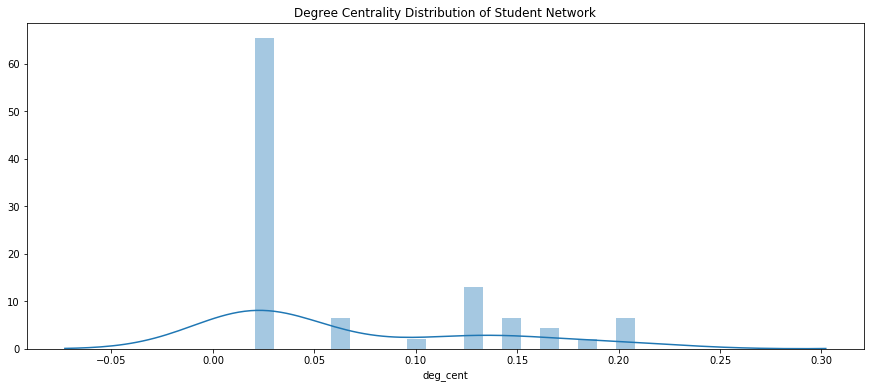

In [86]:
plot_degree_dist(df2.deg_cent,"Degree Centrality",type=2)

<a id='ShortestPath'></a>
# 6 Finding shortest path between two nodes
[TOC](#TOC)

### Methods/functions to learn to use:

* `nx.shortest_path()`

Assuming we have two nodes of interest, we can find the shortest path between them using shortest_path() method.

In [88]:
# what is the shortest path between node 10 and node 113?
source = 10
target = 13
shortest_path = nx.shortest_path(G,source=source,target=target)
print(shortest_path)
for student in shortest_path:
    print(" Next: ",student," ",G.nodes(data=True)[student])

[10, 1.0, 16.0, 13]
 Next:  10   {'Name': 'Oswald.T', 'Degree': 'DS', 'Year': 'PostBac', 'Role': 'Student', 'SA': 0}
 Next:  1.0   {'Name': 'Echard.M', 'Degree': 'DS', 'Year': 'SR', 'Role': 'Student', 'SA': 0}
 Next:  16.0   {'Name': 'Zafiris.M', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 1}
 Next:  13   {'Name': 'Sonaike.T', 'Degree': 'CS', 'Year': 'PostBac', 'Role': 'Student', 'SA': 0}


<a id='Neighbors'></a>
# 7 Finding neighbors of a node
[TOC](#TOC)

### Methods/functions to learn to use:

* `.idxmax()`,`.loc`
* `.neighbors()`

We can get the neighbors of any specified node using the neighbors() method

In [92]:
# get the index of node with the highest degree
max_degree = df2.degree.idxmax()
max_between = df2.between_cent.idxmax()

In [93]:
df2.loc[max_degree,"Name"]

'Islam.I'

In [94]:
# use .loc, .neighbors()
print("Node id with highest degree is: ",max_degree,"/",df2.loc[max_degree,"Name"],
      ", with degree = ",df2.loc[max_degree,"degree"])
print("Neighbors are:")
list(G.neighbors(max_degree))

Node id with highest degree is:  4 / Islam.I , with degree =  10
Neighbors are:


[3.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 9.0, 11.0, 14.0]

In [95]:
print("Node id with highest betweenness centrality is: ",max_between,"/",df2.loc[max_between,"Name"],
      ", with betweenness = ",df2.loc[max_between,"between_cent"])
print("Neighbors are:")
list(G.neighbors(max_between))

Node id with highest betweenness centrality is:  16 / Zafiris.M , with betweenness =  0.37252828436339064
Neighbors are:


[1.0, 11.0, 12.0, 13.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0]

<a id='Visualizing'></a>
# 8 Visualizing the graph
[TOC](#TOC)

### Methods/functions to learn to use:

* list comprehension


Finally, let's see if we can visualize the network by plotting it. 

Now let's get the weights of the edges so we can set their widths in the graph.

In [96]:
edges = G.edges(data=True)

In [97]:
# note that G[index] provide information on all the nodes connected to the node at this index
G[1]

AtlasView({10.0: {'weight': 1.2}, 6.0: {'weight': 0.8}, 16.0: {'weight': 0.8}, 18.0: {'weight': 1.6}, 12.0: {'weight': 0.4}, 5.0: {'weight': 0.8}})

In [98]:
# use a list comprehension on edges to extract the weights from the edge information into a list
weights = [G[u][v]['weight'] for u,v,d in edges]

In [99]:
print(weights)

[1.2, 0.8, 0.8, 1.6, 0.4, 0.8, 2.0, 0.8, 0.8, 1.2, 2.0, 1.6, 1.2, 2.0, 2.0, 0.8, 1.6, 1.6, 1.2, 2.0, 2.0, 1.2, 1.2, 0.4, 0.4, 1.2, 1.2, 0.8, 1.2, 0.8, 1.2, 1.6, 2.0, 0.4, 0.4, 2.0, 0.4, 2.0, 2.0, 2.0, 1.6, 1.6, 0.8, 1.2, 1.6, 2.0, 0.4, 2.0, 0.4, 2.0, 1.6, 1.2, 1.2, 2.0, 1.2, 1.2, 0.8, 1.6, 1.2, 2.0, 0.4, 1.6, 1.2, 0.8, 1.2, 0.8, 0.8, 1.6, 1.6, 0.8, 2.0, 2.0, 1.6, 2.0, 1.6, 2.0, 2.0, 1.2]


Now we can plot the graph and set the size of the nodes to one of the centrality measures, color the nodes according to association of the color_map, and set the edge width to the weight.  

There are many other manipulations of the graph node and edge attributes that we could set up in the meta-data to further refine the plot.

Note also the layout in this case is spring.  This simulates the force that would balance the network if all the connections were modelled as spring forces. 

There are many other layouts that may make for a better vizualization on larger graphs.

<a id='SpringLayout'></a>
# 8.1 Spring layout
[TOC](#TOC)

### Methods/functions to learn to use:

* dictionary comprehension
* `enumerate()` - set up enumerated list of tuples for a list
* `nx.spring_layout`    - spring layout for graph
* `nx.circular_layout`  - circular layout for graph
* `nx.draw_networkx`    - draw a plot of graph including both node and edge information


In [100]:
# set up a color map for the nodes - build a list with a color mapping to each node based on the column you have 
# selected.  Use "Year" as an example but you could also do on Degree, Role, SA etc.abs
col = "Year"
colors =["red","blue","green","yellow","orange","cyan"]

# Use a dictionary comprehension to map each node value in column to node:color dictionary.  Use enumerate() to  
# number the entries of unique values.
dict = {year:colors[count] for count,year  in enumerate(node_df[col].unique())}

In [117]:
# inspect
dict

{'SR': 'red',
 'JR': 'blue',
 'PostBac': 'green',
 'Grad': 'yellow',
 'SO': 'orange'}

In [118]:
# now set up the color for each node in col in graph according to color map in dict
color_map = []
for node in G:
    key = node_df.loc[node,col]
    color_map.append(dict[key])

In [119]:
# inspect
color_map[0:10]

['red', 'blue', 'blue', 'green', 'blue', 'red', 'red', 'blue', 'blue', 'green']

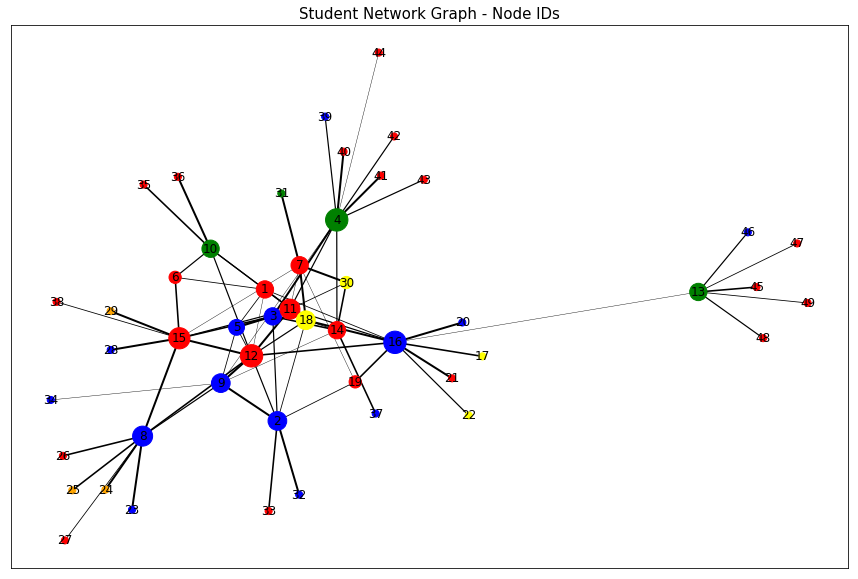

In [120]:
# Spring layout - this is usually a good one to use. use nx.spring_layout(). Set seed so graph gets drawn in same
# orientation every time
# NOTE: In this case graph is drawn with the node index label - Can we label with student's initials?
pos = nx.spring_layout(G,seed=1234)  #setting the positions with respect to G
plt.figure(figsize=(15,10))       #create figure and set figure size

# assign node_colors, node_size equal to degree of node, play with node size until looks good, show edges and edge 
# widths
nx.draw_networkx(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=False,
                  edges=edges, width=weights)
plt.title("Student Network Graph - Node IDs",fontsize= 15)
plt.show()

Let's customize graph further by creating labels of initials for each of the students and setting the labels
to the initials instead of node indexes

In [106]:
# inspect node information for example node 30
node_df.loc[16]

Name      Zafiris.M
Degree           DS
Year             JR
Role        Student
SA                1
Name: 16, dtype: object

### Methods/functions to learn to use:

* dictionary comprehension
* `enumerate()` - set up enumerated list of tuples for a list
* `nx.spring_layout`    - spring layout for graph
* `nx.circular_layout`  - circular layout for graph
* `nx.draw_networkx`    - draw a plot of graph including both node and edge information
* `draw_networkx_labels` - draw alternate labels on a graph nodes
* `nx.draw_networkx_nodes` - draw nodes separately - allows more customization
* `nx.draw_networkx_edges` - draw edges separately - allows more customization

In [112]:
# inspect node data for first node - tuple of node index and position [0] and dictionary of metadata with "Name" at 
# position 1
list(G.nodes(data=True))[0]

(1,
 {'Name': 'Echard.M',
  'Degree': 'DS',
  'Year': 'SR',
  'Role': 'Student',
  'SA': 0,
  'centrality': 6})

In [107]:
# create the first name, last name initials labels for the graph. Use list slicing to get the first and last lettabser
# of student's name, concat into a string and assign to key = node, value = initials in a dictionary.
labels = {}
for node in G.nodes(data=True):
    labels[node[0]]= node[1]["Name"][-1:] +node[1]["Name"][0]

In [108]:
# inspect first five of labels dictionary
for node,initials in labels.items():
    if node < 5:
        print(node,initials)
    else:
        break

1 ME
2 CE
3 YI
4 II


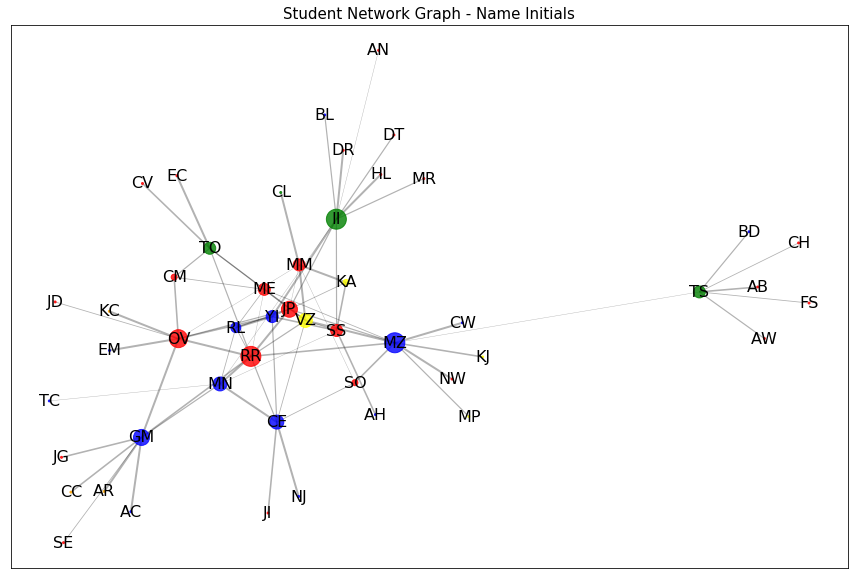

In [110]:
# Spring layout - this is usually a good one to use
pos = nx.spring_layout(G,seed=1234)  #setting the positions with respect to G, not k.
plt.figure(figsize=(15,10))

# set up new graph labels 
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# to get labels and not node index need to plot nodes and edges separately in this case.  As before set up layout, 
# color map and node size. Play with node size until good. In this case node size has been squared.  alpha = sets up 
# a transparency scale to make the graph easier to "see through"
nx.draw_networkx_nodes(G, pos=pos,node_color=color_map,node_size = 4*df2.degree**2,node_labels=True,
                  edges=edges, width=weights,alpha=0.8)
nx.draw_networkx_edges(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=False,
                  edges=edges,width=weights,alpha=0.3)

plt.title("Student Network Graph - Name Initials",fontsize= 15)
plt.show()

<a id='CircularLayout'></a>
# 8.2 Circular layout
[TOC](#TOC)

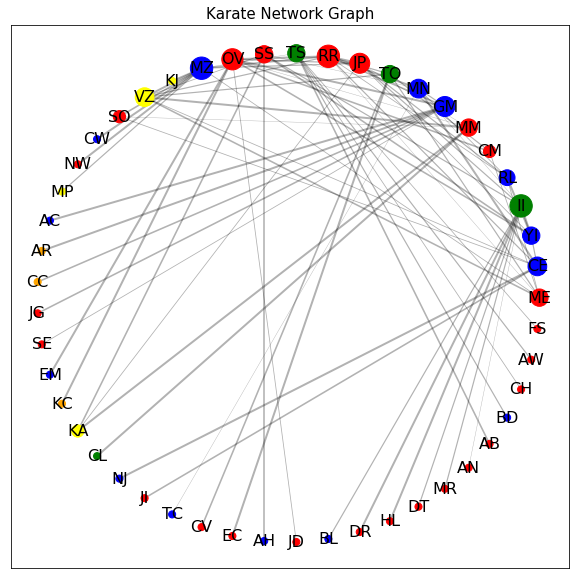

In [111]:
# circular layout
pos = nx.circular_layout(G)  #setting the positions with respect to G, not k.
plt.figure(figsize=(10,10))

nx.draw_networkx_labels(G, pos, labels, font_size=16)

nx.draw_networkx_nodes(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=True,
                  edges=edges, width=weights)
nx.draw_networkx_edges(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=True,
                  edges=edges, width=weights,alpha=0.3)
plt.title("Karate Network Graph",fontsize= 15)
plt.show()

### Circos layout

<a id='CircosLayout'></a>
# 8.3 Circos layout
[TOC](#TOC)

The "circos" plot layout is another useful plot layout sometimes seen, especially in genomic analysis connecting genetic relationships visually.

### Methods/functions to learn to use:

* `CircosPlot()`
* `.sort_values(by= )`

In [112]:
# let's see highest degree nodes by year and degree - sort the df2 dataframe in ascending order by year and degree
# centrality within year  - What are the top 3 nodes/students with the highest number of connections?
df2.sort_values(by=["Year","degree"],ascending=False).head()

,Name,Degree,Year,Role,SA,degree,degree_wtd,deg_cent,between_cent,close_cent,clustering
node,,,,,,,,,,,
12,Rios.R,DS,SR,Student,0,10,14.0,0.208333,0.224569,0.484848,0.311111
15,Vega.O,DS,SR,Student,0,9,13.6,0.187500,0.166903,0.421053,0.111111
11,Pham.J,DS,SR,Student,0,8,8.8,0.166667,0.180763,0.461538,0.285714
1,Echard.M,DS,SR,Student,0,6,5.6,0.125000,0.029685,0.393443,0.466667
7,Martinez.M,DS,SR,Student,0,6,7.2,0.125000,0.059205,0.387097,0.133333


In [113]:
# need to create meta-data in dictionary for circos plot - add centrality measure
for n in G.nodes():
    G.nodes[n]['centrality'] = df2.degree.loc[n]
G.nodes[33]

{'Name': 'Ibe.J',
 'Degree': 'DS',
 'Year': 'SR',
 'Role': 'Student',
 'SA': 1,
 'centrality': 1}

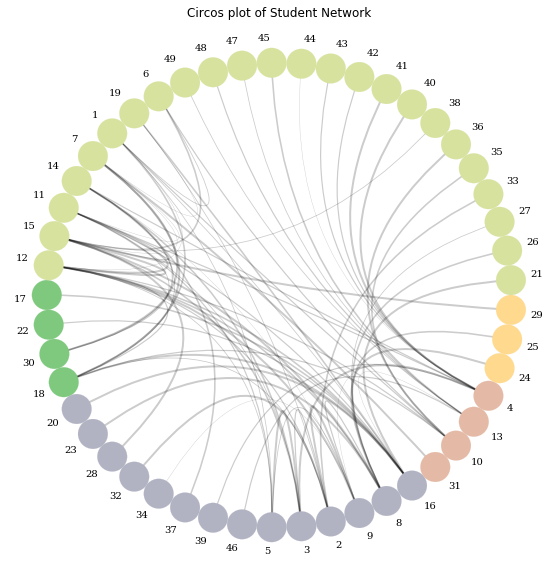

In [116]:
# Import necessary modules
import matplotlib.pyplot as plt

from nxviz import CircosPlot
#import CircosPlot from nxviz


# Create the CircosPlot object: c
# Color nodes by "Year", group by "Year", order by centrality, set edge width to weight
c = CircosPlot(G,node_color = "Year",node_grouping= "Year",node_order = 'centrality',node_labels=True,
               edge_width = 'weight',figsize= (10,10))
plt.title("Circos plot of Student Network")

# Draw c to the screen
c.draw()

# Display the plot
plt.show()



<a id='Subgraph'></a>
# 9 Creating a sub-graph
[TOC](#TOC)

### Methods/functions to learn to use:

* `.subgraph()`
* `.sort_values(by= )`

Sometimes it is useful to examine a sub-graph of selected nodes in a network.  We can use the subgraph() method for this.

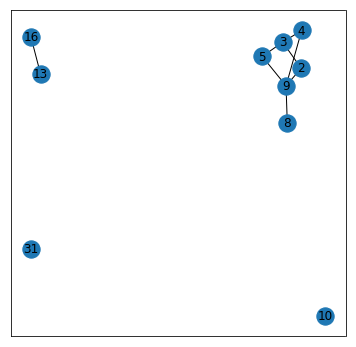

In [115]:
# suppose we want the subgraph of the following nodes
res = [5,3,2,9,8,16,31,10,13,4]
k = G.subgraph(res)  
pos = nx.spring_layout(k)  #setting the positions with respect to G, not k.
plt.figure(figsize=(6,6))
nx.draw_networkx(k, pos=pos)
plt.show()

<pre>_____________________________________________________________________________________________________</pre>

<a id='ExtraCredit'></a>
# 10 Extra Credit and Questions 
## Answer this problem in a new Jupyter Notebook
[TOC](#TOC)

In [121]:
# Repeat analysis using the CS2311 Spring 2020 Student data file

1.	What is the shortest path between me and the highest centrality node? (assuming you aren’t the highest centrality node otherwise, pick the next most central node).

2.	Who are the neighbors of the highest degree centrality node?

3.	What is the subgraph and plot of your node and the nodes of the two highest degree centrality node – This could form a basis for a recommendation engine for students to get to know (they seem to be connected and central for some reason)